In [10]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates
from main import *


#reads files from directory
rp_9300_LH = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\data 2\lighthouse\Rockport\Rockport_1993-2002_pwl_harmwl_bwl.csv')
rp_9300_LH.drop(labels=range(876480,876486),axis = 0, inplace = True)
rp_0112_LH = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\data 2\lighthouse\Rockport\Rockport_2003-2012_pwl_harmwl_bwl.csv')
rp_0112_LH.drop(labels=range(876720,876726), axis = 0, inplace=True)
rp_1323_LH = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\data 2\lighthouse\Rockport\Rockport_2013-2023_pwl_harmwl_bwl.csv')
rp_1323_LH.drop(labels=range(len(rp_1323_LH)-6,len(rp_1323_LH)), axis=0, inplace=True)
directory_path = r'C:\Users\rprocious\PSM Lighthouse\CBI\data 2\NOAA\rockport'
dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

#formats the dataframes
rp_NOAA = pd.concat(dataframes, ignore_index=True)
rp_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
rp_NOAA.reset_index(drop = True, inplace=True)
frames = [rp_9300_LH,rp_0112_LH,rp_1323_LH]
rp_LH = pd.concat(frames, ignore_index=True)
rp_LH.drop(labels=range(0,262800),axis=0, inplace=True)
rp_LH.reset_index(drop=True, inplace=True)

#renames the dataframes
comparison_df = pd.DataFrame()
comparison_df['Dates'] = rp_LH['#date+time']
comparison_df['Lighthouse WL'] = rp_LH['015-pwl']
comparison_df['NOAA WL'] = rp_NOAA[' Water Level']

#converts to numeric and date time values
comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()


#reading the new satelite data

RP_2007 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\rock-port-2007-output.csv')
#RP_2007 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/rock-port-2007-output.csv')
RP_2008 = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\2007-08 NWLON Station 6min Corrections\rock-port-2008-output.csv')
#RP_2008 = pd.read_csv('/Users/rprocious/Waterlevels_CBI/CBI-2/2007-08 NWLON Station 6min Corrections/2007-08 NWLON Station 6min Corrections/rock-port-2008-output.csv')

#formating the dataset
RP_2007.reset_index(drop = True, inplace=True)
RP_2008.reset_index(drop = True, inplace=True)
RP_2007.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
RP_2007['Dates'] = pd.to_datetime(RP_2007['Date'])
RP_2007['Water Level'] = pd.to_numeric(RP_2007['Water Level'], errors='coerce')
RP_2008.replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
RP_2008['Dates'] = pd.to_datetime(RP_2008['Date'])
RP_2008['Water Level'] = pd.to_numeric(RP_2008['Water Level'], errors='coerce')
RP = pd.concat([RP_2007,RP_2008],ignore_index=True)

#creates dataset with all values
total_df = RP.merge(comparison_df,on='Dates',how='outer')
total_df = total_df.drop(columns='Station #',axis=0)
total_df = total_df.drop(columns='Date',axis=0)
total_df['NES WL'] = total_df["Water Level"]


C:\Users\rprocious\AppData\Local\Temp\ipykernel_16920\596281388.py:14: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  rp_9300_LH = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\data 2\lighthouse\Rockport\Rockport_1993-2002_pwl_harmwl_bwl.csv')
C:\Users\rprocious\AppData\Local\Temp\ipykernel_16920\596281388.py:18: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  rp_1323_LH = pd.read_csv(r'C:\Users\rprocious\PSM Lighthouse\CBI\data 2\lighthouse\Rockport\Rockport_2013-2023_pwl_harmwl_bwl.csv')
C:\Users\rprocious\AppData\Local\Temp\ipykernel_16920\596281388.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [11]:
total_df

,Water Level,Dates,Lighthouse WL,NOAA WL,NES WL
0,NaN,1996-01-01 00:00:00,1.957,1.957,NaN
1,NaN,1996-01-01 00:06:00,1.956,1.956,NaN
2,NaN,1996-01-01 00:12:00,1.955,1.955,NaN
3,NaN,1996-01-01 00:18:00,1.958,1.958,NaN
4,NaN,1996-01-01 00:24:00,1.961,1.961,NaN
...,...,...,...,...,...
2454509,NaN,2023-12-31 23:30:00,NaN,NaN,NaN
2454510,NaN,2023-12-31 23:36:00,NaN,NaN,NaN
2454511,NaN,2023-12-31 23:42:00,NaN,NaN,NaN
2454512,NaN,2023-12-31 23:48:00,NaN,NaN,NaN


Text(0.5, 1.0, 'Rockport Offset Correction 1')

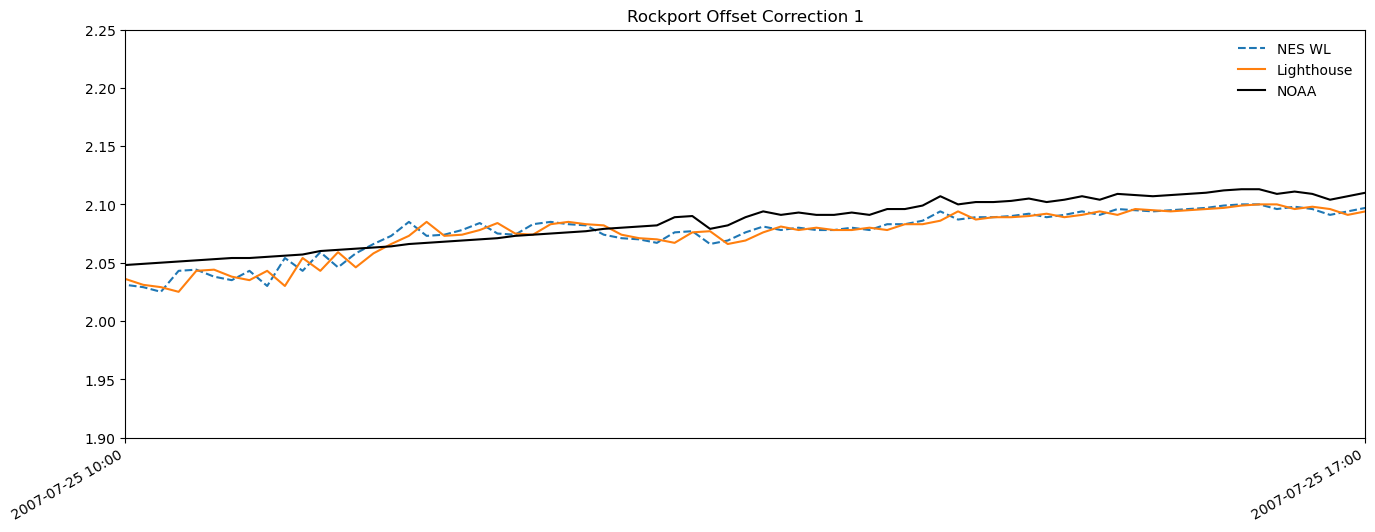

In [12]:
#### Plotting for verrificaion
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.9,2.25)

start_date = pd.to_datetime('2007-07-25 10:00')

end_date = pd.to_datetime('2007-07-25 17:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport Offset Correction 1')

Text(0.5, 1.0, 'Rockport Offset Correction 2')

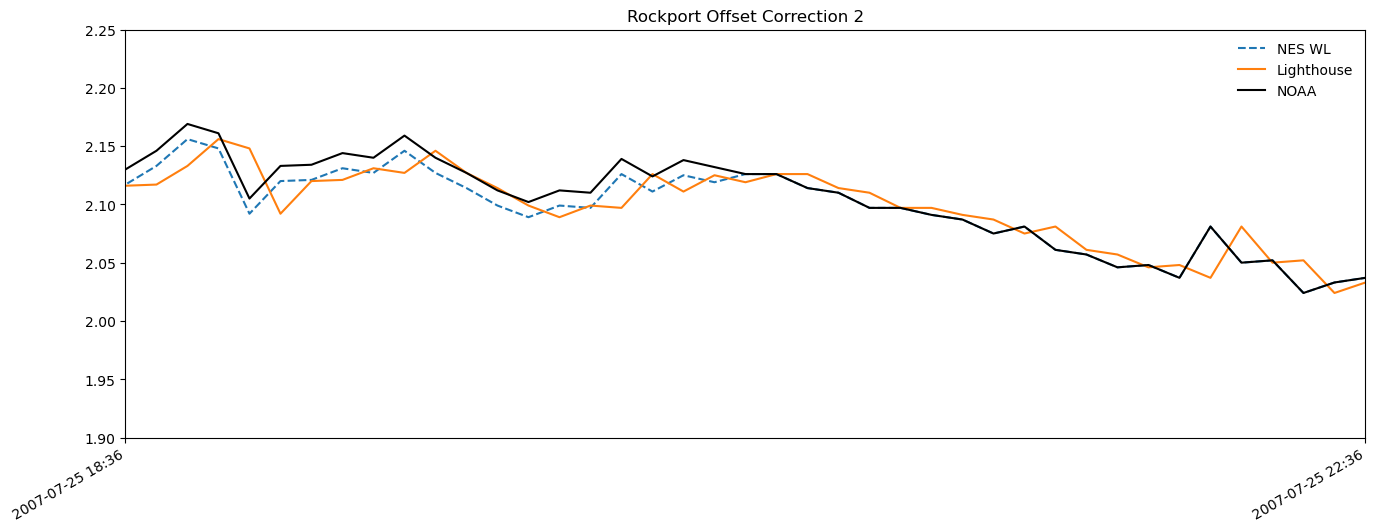

In [13]:
#### Plotting for verrificaion
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.9,2.25)

start_date = pd.to_datetime('2007-07-25 18:36')

end_date = pd.to_datetime('2007-07-25 22:36')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport Offset Correction 2')

Text(0.5, 1.0, 'Unknown Issue')

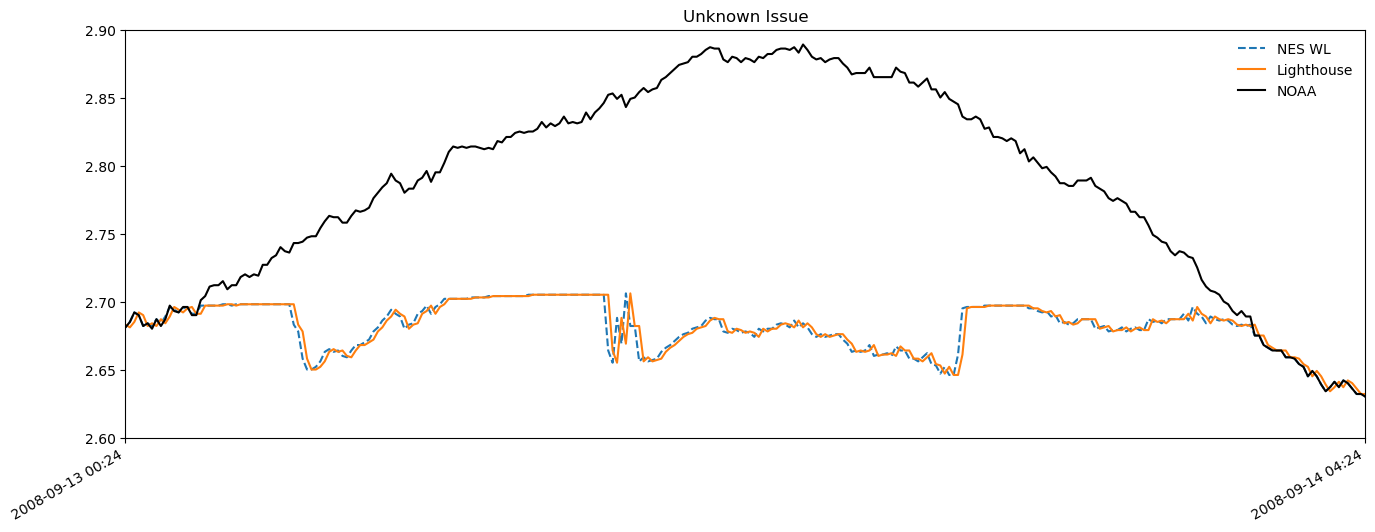

In [14]:
#### Plotting for verrificaion
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(2.6,2.9)

start_date = pd.to_datetime('2008-09-13 00:24')

end_date = pd.to_datetime('2008-09-14 04:24')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Unknown Issue')

NameError: name 'fplt' is not defined

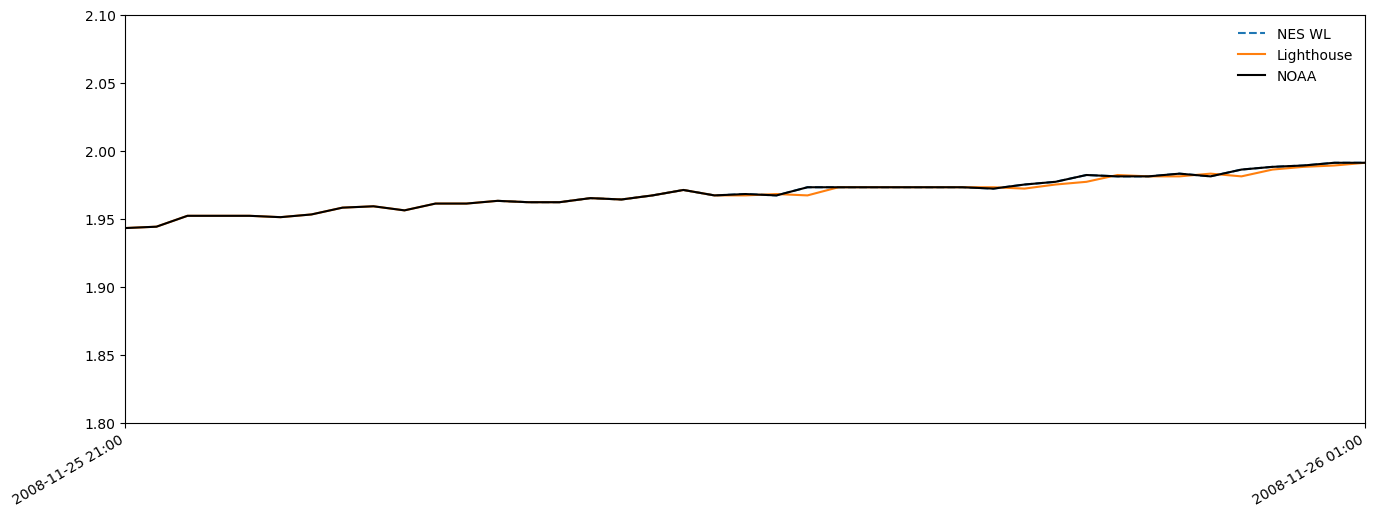

In [15]:
plt.figure(figsize=(16,6))

plt.plot(total_df['Dates'],total_df['NES WL'],label = 'NES WL', linestyle = 'dashed')

plt.plot(total_df['Dates'],total_df['Lighthouse WL'],label = 'Lighthouse')

plt.plot(total_df['Dates'],total_df['NOAA WL'],label = 'NOAA', color='Black')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=400))

plt.gcf().autofmt_xdate()

plt.ylim(1.8,2.1)

start_date = pd.to_datetime('2008-11-25 21:00')

end_date = pd.to_datetime('2008-11-26 01:00')

plt.xlim(start_date, end_date)
plt.legend(frameon = False)
plt.title('Rockport Offset Correction 3')

In [29]:
from main import *

broad_stats(total_df)

0.0